In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install xgboost
from xgboost import XGBRegressor

In [79]:
df = pd.read_csv("Global GDP Explorer 2025 (World Bank  UN Data).csv")

In [80]:
df.head()

,Unnamed: 0,Country,"GDP (nominal, 2023)",GDP (abbrev.),GDP Growth,Population 2023,GDP per capita,Share of World GDP
0,0,United States,"$27,720,700,000,000",27.721 trillion,2.89%,343477335,"$80,706",26.11%
1,1,China,"$17,794,800,000,000",17.795 trillion,5.25%,1422584933,"$12,509",16.76%
2,2,Germany,"$4,525,700,000,000",4.526 trillion,−0.27%,84548231,"$53,528",4.26%
3,3,Japan,"$4,204,490,000,000",4.204 trillion,1.68%,124370947,"$33,806",3.96%
4,4,India,"$3,567,550,000,000",3.568 trillion,8.15%,1438069596,"$2,481",3.36%


In [76]:
df.describe()

,Unnamed: 0,Population 2023
count,181.000000,1.810000e+02
mean,90.000000,4.358453e+07
std,52.394338,1.555468e+08
min,0.000000,9.816000e+03
25%,45.000000,2.311472e+06
50%,90.000000,9.130429e+06
75%,135.000000,3.363516e+07
max,180.000000,1.438070e+09


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           181 non-null    int64 
 1   Country              181 non-null    object
 2   GDP (nominal, 2023)  181 non-null    object
 3   GDP (abbrev.)        181 non-null    object
 4   GDP Growth           181 non-null    object
 5   Population 2023      181 non-null    int64 
 6   GDP per capita       181 non-null    object
 7   Share of World GDP   181 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.4+ KB


In [86]:
df.columns = df.columns.str.strip()

In [88]:
df = df.drop(columns=['Unnamed: 0', 'GDP (abbrev.)'])

In [90]:
def clean_numeric(col):
    return pd.to_numeric(
        col.astype(str).str.replace(r'[^0-9.-]', '', regex=True),
        errors='coerce'
    )

In [92]:
df['GDP (nominal, 2023)'] = clean_numeric(df['GDP (nominal, 2023)'])
df['GDP Growth'] = clean_numeric(df['GDP Growth'])
df['GDP per capita'] = clean_numeric(df['GDP per capita'])
df['Share of World GDP'] = clean_numeric(df['Share of World GDP'])

In [94]:
# Eksik değerlerin temizlenmesi
df = df.dropna()

In [96]:
# Country kolonunun one-hot encoding ile sayısal değere çevirilmesi
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [98]:
# EDA

In [100]:
print("\nİstatistikler:")
display(df.describe())


İstatistikler:


,"GDP (nominal, 2023)",GDP Growth,Population 2023,GDP per capita,Share of World GDP
count,1.810000e+02,181.000000,1.810000e+02,181.000000,181.000000
mean,5.777519e+11,4.157680,4.358453e+07,17711.292818,0.544021
std,2.516689e+12,6.365921,1.555468e+08,23301.494510,2.370397
min,6.228031e+07,0.040000,9.816000e+03,193.000000,0.000059
25%,1.464452e+10,1.860000,2.311472e+06,2478.000000,0.014000
50%,4.852960e+10,3.160000,9.130429e+06,7182.000000,0.046000
75%,3.355330e+11,5.090000,3.363516e+07,22798.000000,0.320000
max,2.772070e+13,75.060000,1.438070e+09,128936.000000,26.110000


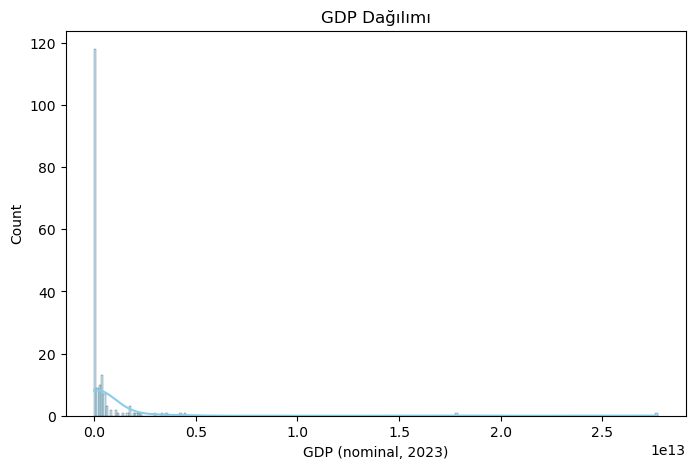

In [102]:
plt.figure(figsize=(8,5))
sns.histplot(df['GDP (nominal, 2023)'], kde=True, color='skyblue')
plt.title("GDP Dağılımı")
plt.show()

In [109]:
# Veri hazırlama 

In [110]:
target = 'GDP (nominal, 2023)'
X = df.drop(target, axis=1)
y = df[target]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [115]:
# XGboost algoritması ve GridSearchCV(hyperparameter tuning)

In [117]:
xgb = XGBRegressor(random_state=15)

param_grid = {
    'n_estimators':[100, 200],
    'max_depth':[3, 5],
    'learning_rate':[0.05, 0.1]
}

In [119]:
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [121]:
print("\nEn iyi parametreler:", grid.best_params_)

best_model = grid.best_estimator_


En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [123]:
# Model Tahmini

In [125]:
y_pred = best_model.predict(X_test)

In [127]:
# Model Performansı

In [131]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [133]:
print("--- Model Performansı ---")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

--- Model Performansı ---
MAE  : 31253154056.62
RMSE : 130910387160.23
R²   : 0.96


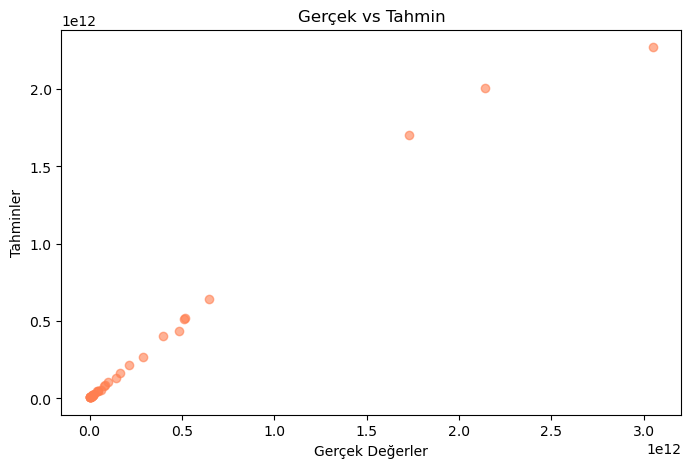

In [135]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin")
plt.show()